In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
import numpy.ma.mrecords as mrecords
from pandas import Series
from pandas import DataFrame
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
#model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report
scaler = StandardScaler() #chuan hoa du lieu dua ve chuan (0,1)
#vizualation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
dfFeatures = []
for i in df.columns:
    dfFeatures.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(dfFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,[1]
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


# Tiền xử lý

In [5]:
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

<AxesSubplot:>

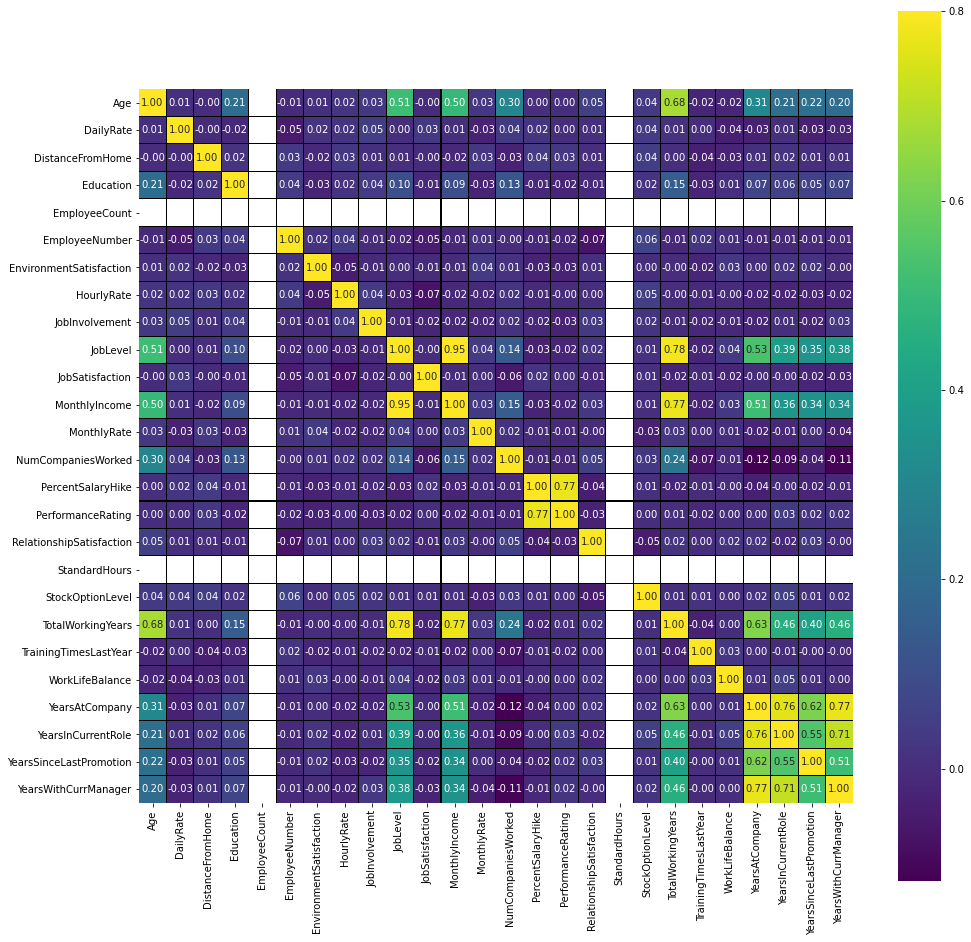

In [6]:
colormap = plt.cm.viridis
cor = df.corr()
cor = cor.drop(['Attrition'],axis=1).drop(['Attrition'],axis=0)
plt.figure(figsize=(16,16))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='black',linewidths=0.1)

In [7]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [8]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [9]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [10]:
df['EducationField'].replace('Life Sciences',1, inplace=True)
df['EducationField'].replace('Medical',2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Other',4, inplace=True)
df['EducationField'].replace('Technical Degree',5, inplace=True)
df['EducationField'].replace('Human Resources', 6, inplace=True)

In [11]:
df['Department'].replace('Research & Development',1, inplace=True)
df['Department'].replace('Sales',2, inplace=True)
df['Department'].replace('Human Resources', 3, inplace=True)

In [12]:
df['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
df['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
df['BusinessTravel'].replace('Non-Travel',3, inplace=True)

In [13]:
df['Gender'].replace('Male',1, inplace=True)
df['Gender'].replace('Female',0, inplace=True)

In [14]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [15]:
df['JobRole'].replace('Sales Executive',1, inplace=True)
df['JobRole'].replace('Research Scientist',2, inplace=True)
df['JobRole'].replace('Laboratory Technician', 3, inplace=True)
df['JobRole'].replace('Manufacturing Director',4, inplace=True)
df['JobRole'].replace('Healthcare Representative',5, inplace=True)
df['JobRole'].replace('Manager', 6, inplace=True)
df['JobRole'].replace('Sales Representative',7, inplace=True)
df['JobRole'].replace('Research Director',8, inplace=True)
df['JobRole'].replace('Human Resources',9, inplace=True)

In [16]:
df['JobRole'].value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

In [17]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [18]:
df['MaritalStatus'].replace('Married',1, inplace=True)
df['MaritalStatus'].replace('Single',2, inplace=True)
df['MaritalStatus'].replace('Divorced',3, inplace=True)

In [19]:
df['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [20]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [21]:
df['OverTime'].replace('Yes',1, inplace=True)
df['OverTime'].replace('No',0, inplace=True)

In [22]:
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [23]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,2,1005,1,2,2,1,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1,1324,1,3,3,2,10,3,...,4,1,3,12,3,2,1,0,0,0
7,30,0,1,1358,1,24,1,1,11,4,...,4,2,1,1,2,3,1,0,0,0
8,38,0,2,216,1,23,3,1,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,0,1,1299,1,27,3,2,13,3,...,3,2,2,17,3,2,7,7,7,7


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

# Model Train

In [25]:
Y = df['Attrition']
X = df.drop(["Attrition"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=0)

In [26]:
X_train[["Age","BusinessTravel","DailyRate","DistanceFromHome","Department","Education","EducationField","EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_train[["Age","BusinessTravel","DailyRate","DistanceFromHome","Department","Education","EducationField","EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
X_train.head()

<ipython-input-26-3430df61abe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Age","BusinessTravel","DailyRate","DistanceFromHome","Department","Education","EducationField","EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_train[["Age","BusinessTravel","DailyRate","DistanceFromHome","Department","Education","EducationField","Employe

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,2.338937,-0.595307,-0.485574,1.067985,1.455677,0.080874,-0.842396,1.532420,1.139990,-1.240950,...,-0.420924,0.26452,0.225056,2.303433,-0.613495,-1.072247,-0.982008,-1.156841,-0.673815,-1.150439
1092,0.904326,-0.595307,0.364653,-0.678817,2.316288,0.080874,2.108186,0.873054,1.139990,0.805834,...,2.375725,1.19034,0.225056,-0.408245,0.186361,0.330381,-0.325382,-0.054820,-0.673815,-0.308375
768,0.352553,-0.595307,-1.237223,1.067985,2.070399,0.080874,0.632895,0.065667,0.227377,0.805834,...,-0.420924,-0.66130,0.225056,-0.408245,0.186361,-1.072247,0.002931,0.771696,1.509123,0.253001
569,-0.088866,2.371138,1.557435,1.067985,-0.142599,1.071582,-0.842396,-0.400262,-1.597848,0.805834,...,-0.420924,-0.66130,-0.930689,-0.149990,-1.413352,0.330381,0.495401,0.771696,-0.673815,1.375753
911,-1.302767,0.887916,-0.500360,1.067985,1.824510,-1.900542,-0.842396,0.413853,0.227377,0.805834,...,-0.420924,1.19034,-0.930689,-1.312138,0.986217,0.330381,-0.982008,-1.156841,-0.361967,-1.150439


In [27]:
model = LogisticRegression()
model = model.fit(X_train, Y_train)

# kiểm tra độ chính xác trên tập train
model.score(X_train, Y_train)

0.8886054421768708

In [28]:
x_train_const = sm.add_constant(X_train)
x_train_const.head()

,const,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,1.0,2.338937,-0.595307,-0.485574,1.067985,1.455677,0.080874,-0.842396,1.532420,1.139990,...,-0.420924,0.26452,0.225056,2.303433,-0.613495,-1.072247,-0.982008,-1.156841,-0.673815,-1.150439
1092,1.0,0.904326,-0.595307,0.364653,-0.678817,2.316288,0.080874,2.108186,0.873054,1.139990,...,2.375725,1.19034,0.225056,-0.408245,0.186361,0.330381,-0.325382,-0.054820,-0.673815,-0.308375
768,1.0,0.352553,-0.595307,-1.237223,1.067985,2.070399,0.080874,0.632895,0.065667,0.227377,...,-0.420924,-0.66130,0.225056,-0.408245,0.186361,-1.072247,0.002931,0.771696,1.509123,0.253001
569,1.0,-0.088866,2.371138,1.557435,1.067985,-0.142599,1.071582,-0.842396,-0.400262,-1.597848,...,-0.420924,-0.66130,-0.930689,-0.149990,-1.413352,0.330381,0.495401,0.771696,-0.673815,1.375753
911,1.0,-1.302767,0.887916,-0.500360,1.067985,1.824510,-1.900542,-0.842396,0.413853,0.227377,...,-0.420924,1.19034,-0.930689,-1.312138,0.986217,0.330381,-0.982008,-1.156841,-0.361967,-1.150439


In [29]:
logit = sm.Logit(Y_train, x_train_const)

In [30]:
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.319257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1144
Method:                           MLE   Df Model:                           31
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.2735
Time:                        22:33:27   Log-Likelihood:                -375.45
converged:                       True   LL-Null:                       -516.79
Covariance Type:            nonrobust   LLR p-value:                 2.077e-42
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4523      0.137    -17.882      0.000      -2.721

# md

In [31]:
df_1=df.drop(columns=['BusinessTravel','DailyRate','Education','EmployeeNumber','Gender','HourlyRate','JobLevel','JobRole','MaritalStatus','MonthlyIncome','MonthlyRate','PercentSalaryHike','PerformanceRating','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany' ])

In [32]:
Y = df_1['Attrition']
X = df_1.drop(["Attrition"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=0)

In [33]:
X_train[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_train[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
X_train.head()

<ipython-input-33-ba12e898673f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_train[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1

,Age,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,2.338937,1.067985,1.455677,-0.842396,1.139990,0.385478,1.149726,0.514544,1.625074,0.26452,0.225056,-1.072247,-1.156841,-0.673815,-1.150439
1092,0.904326,-0.678817,2.316288,2.108186,1.139990,0.385478,1.149726,0.514544,-0.615356,1.19034,0.225056,0.330381,-0.054820,-0.673815,-0.308375
768,0.352553,1.067985,2.070399,0.632895,0.227377,0.385478,-1.572578,-0.675824,-0.615356,-0.66130,0.225056,-1.072247,0.771696,1.509123,0.253001
569,-0.088866,1.067985,-0.142599,-0.842396,-1.597848,-1.013665,-1.572578,-0.675824,-0.615356,-0.66130,-0.930689,0.330381,0.771696,-0.673815,1.375753
911,-1.302767,1.067985,1.824510,-0.842396,0.227377,-2.412809,1.149726,-0.675824,1.625074,1.19034,-0.930689,0.330381,-1.156841,-0.361967,-1.150439


In [34]:
x_train_const=sm.add_constant(X_train)

In [35]:
logit = sm.Logit(Y_train,x_train_const)

In [36]:
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.333439
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                           15
Date:                Wed, 05 May 2021   Pseudo R-squ.:                  0.2412
Time:                        22:33:27   Log-Likelihood:                -392.12
converged:                       True   LL-Null:                       -516.79
Covariance Type:            nonrobust   LLR p-value:                 1.711e-44
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.2989      0.124    -18.512      0.000      -2.542

In [37]:
y_predicted_train = result.predict(x_train_const)
y_predicted_train.head()

1374    0.098325
1092    0.024367
768     0.209979
569     0.100707
911     0.765049
dtype: float64

In [38]:
y_predicted_train_df = pd.DataFrame(index= Y_train.index, columns=('Leave','Leave_Probability'))
y_predicted_train_df = pd.DataFrame({'Leave': Y_train.values, 'Leave_Probability':y_predicted_train})
y_predicted_train_df.index.name = 'employeeID'
y_predicted_train_df.head()

,Leave,Leave_Probability
employeeID,,
1374,0,0.098325
1092,0,0.024367
768,0,0.209979
569,0,0.100707
911,1,0.765049


In [39]:
y_predicted_train_df['Leave_Predict'] = y_predicted_train_df.Leave_Probability.map(lambda x: 1 if x >=0.45 else 0)
print(y_predicted_train_df)

            Leave  Leave_Probability  Leave_Predict
employeeID                                         
1374            0           0.098325              0
1092            0           0.024367              0
768             0           0.209979              0
569             0           0.100707              0
911             1           0.765049              1
...           ...                ...            ...
763             0           0.209557              0
835             0           0.250304              0
1216            0           0.057725              0
559             0           0.344733              0
684             0           0.361510              0

[1176 rows x 3 columns]


# MODEL TEST

In [40]:
X_test[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_test[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
X_test.head()

<ipython-input-40-1dea0a3c0adb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]=scaler.fit_transform(X_test[["Age","DistanceFromHome","Department","EducationField","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","NumCompaniesWorked","OverTime","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:173

,Age,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,-0.148809,1.100315,0.084789,-0.138363,-0.564468,0.356182,1.167525,-0.688131,-0.680211,1.195863,-0.942376,-1.102760,-0.376347,2.045776,0.775758
1091,-0.468151,-0.706906,1.963772,-0.891675,1.300179,-1.078305,-0.643833,-0.688131,-0.680211,1.195863,-0.942376,0.370928,-0.376347,-0.700608,-0.620037
981,-0.255256,1.100315,1.086913,0.614948,1.300179,0.356182,0.261846,-1.104408,1.470133,0.273071,0.316981,-1.102760,-0.655053,0.214853,-0.620037
785,0.276980,-0.706906,1.337444,2.121571,-1.496792,0.356182,1.167525,0.560700,-0.680211,1.195863,0.316981,0.370928,1.574592,2.656084,-0.899196
1332,-0.893940,-0.706906,1.838507,-0.891675,1.300179,-1.078305,1.167525,-0.688131,1.470133,-0.649721,-0.942376,-1.102760,-1.212464,-0.395454,-1.178355


In [41]:
model = LogisticRegression()
model = model.fit(X_test, Y_test)

# kiểm tra độ chính xác trên tập test
model.score(X_test, Y_test)

0.8775510204081632

In [42]:
x_test_const=sm.add_constant(X_test)
x_test_const.head()

,const,Age,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,1.0,-0.148809,1.100315,0.084789,-0.138363,-0.564468,0.356182,1.167525,-0.688131,-0.680211,1.195863,-0.942376,-1.102760,-0.376347,2.045776,0.775758
1091,1.0,-0.468151,-0.706906,1.963772,-0.891675,1.300179,-1.078305,-0.643833,-0.688131,-0.680211,1.195863,-0.942376,0.370928,-0.376347,-0.700608,-0.620037
981,1.0,-0.255256,1.100315,1.086913,0.614948,1.300179,0.356182,0.261846,-1.104408,1.470133,0.273071,0.316981,-1.102760,-0.655053,0.214853,-0.620037
785,1.0,0.276980,-0.706906,1.337444,2.121571,-1.496792,0.356182,1.167525,0.560700,-0.680211,1.195863,0.316981,0.370928,1.574592,2.656084,-0.899196
1332,1.0,-0.893940,-0.706906,1.838507,-0.891675,1.300179,-1.078305,1.167525,-0.688131,1.470133,-0.649721,-0.942376,-1.102760,-1.212464,-0.395454,-1.178355


In [43]:
y_predicted_test = result.predict(x_test_const)
y_predicted_test.head()

442     0.161925
1091    0.090852
981     0.319279
785     0.178605
1332    0.588258
dtype: float64

In [44]:
y_predicted_test_df = pd.DataFrame(index= Y_test.index, columns=('Leave','Leave_Probability'))
y_predicted_test_df = pd.DataFrame({'Leave':Y_test.values, 'Leave_Probability':y_predicted_test})
y_predicted_test_df.index.name = 'employeeID'
y_predicted_test_df.head()

,Leave,Leave_Probability
employeeID,,
442,0,0.161925
1091,0,0.090852
981,1,0.319279
785,0,0.178605
1332,1,0.588258


In [45]:
# Dự đoán khả năng attrition trên tập test
#Tạo cột 'predicted' nhận giá trị 1 nếu Attrition_Prob > 0.5 nếu không nhận giá trị 0
y_predicted_test_df['Leave_Predict'] = y_predicted_test_df.Leave_Probability.map(lambda x: 1 if x >=0.45 else 0)
y_predicted_test_df.head()

,Leave,Leave_Probability,Leave_Predict
employeeID,,,
442,0,0.161925,0
1091,0,0.090852,0
981,1,0.319279,0
785,0,0.178605,0
1332,1,0.588258,1


In [46]:
aug = y_predicted_test_df[y_predicted_test_df.Leave== 1]
aug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 981 to 124
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Leave              49 non-null     int64  
 1   Leave_Probability  49 non-null     float64
 2   Leave_Predict      49 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


In [47]:
aug.head()

,Leave,Leave_Probability,Leave_Predict
employeeID,,,
981,1,0.319279,0
1332,1,0.588258,1
1058,1,0.596646,1
122,1,0.107983,0
940,1,0.128839,0


# đánh giá độ hiệu quả của mô hình

In [48]:
confusion_matrix = metrics.confusion_matrix(y_predicted_test_df['Leave'], y_predicted_test_df['Leave_Predict'])
print(confusion_matrix)

[[234  11]
 [ 29  20]]


In [49]:
print(classification_report(y_predicted_test_df['Leave'], y_predicted_test_df['Leave_Predict']))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       245
           1       0.65      0.41      0.50        49

    accuracy                           0.86       294
   macro avg       0.77      0.68      0.71       294
weighted avg       0.85      0.86      0.85       294



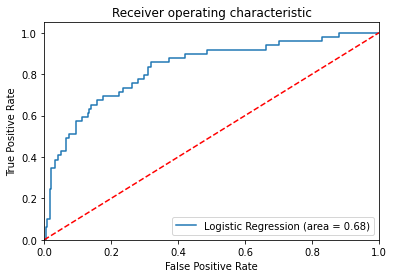

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, y_predicted_test_df['Leave_Predict'])
fpr, tpr, thresholds = roc_curve(Y_test,y_predicted_test_df['Leave_Probability'] )
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
metrics.accuracy_score(y_predicted_test_df['Leave'],y_predicted_test_df['Leave_Predict'])

0.8639455782312925

In [52]:
x_1=df.drop(["Attrition"],axis=1)
x_1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,2,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,2,7,1,1,...,3,4,1,6,3,3,2,2,2,2


In [53]:
doan_train = pd.DataFrame(index= Y_train.index, columns=('Leave','Leave_Probability'))
doan_train = pd.DataFrame({'Leave':Y_train.values, 'Leave_Probability':y_predicted_train})
doan_train.index.name = 'employeeID'
doan_train.head()

,Leave,Leave_Probability
employeeID,,
1374,0,0.098325
1092,0,0.024367
768,0,0.209979
569,0,0.100707
911,1,0.765049


In [54]:
doan_test = pd.DataFrame(index= Y_test.index, columns=('Leave','Leave_Probability'))
doan_test = pd.DataFrame({'Leave':Y_test.values, 'Leave_Probability':y_predicted_test})
doan_test.index.name = 'employeeID'
doan_test.head()

,Leave,Leave_Probability
employeeID,,
442,0,0.161925
1091,0,0.090852
981,1,0.319279
785,0,0.178605
1332,1,0.588258


In [55]:
dudoan_total=doan_train.append(doan_test)
dudoan_total.head()

,Leave,Leave_Probability
employeeID,,
1374,0,0.098325
1092,0,0.024367
768,0,0.209979
569,0,0.100707
911,1,0.765049


In [56]:
outp=x_1.merge(dudoan_total,left_on=None, right_on=None, left_index=True, right_index=True)
outp.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Leave,Leave_Probability
0,41,1,1102,2,1,2,1,1,2,0,...,0,8,0,1,6,4,0,5,1,0.429860
1,49,2,279,1,8,1,1,2,3,1,...,1,10,3,3,10,7,1,7,0,0.006089
2,37,1,1373,1,2,2,4,4,4,1,...,0,7,3,3,0,0,0,0,1,0.526400
3,33,2,1392,1,3,4,1,5,4,0,...,0,8,3,3,8,7,3,0,0,0.143946
4,27,1,591,1,2,1,2,7,1,1,...,1,6,3,3,2,2,2,2,0,0.280946


In [57]:
final=outp.drop(["Leave"],axis=1)
final.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Leave_Probability
0,41,1,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,0.429860
1,49,2,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0.006089
2,37,1,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,0.526400
3,33,2,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0.143946
4,27,1,591,1,2,1,2,7,1,1,...,4,1,6,3,3,2,2,2,2,0.280946


In [58]:
a=final.to_csv (r'E:\baocao_dss\dudoan_total.csv', index = True, header=True)

In [59]:
muc=final[['Age','Leave_Probability']]
muc.head()

,Age,Leave_Probability
0,41,0.429860
1,49,0.006089
2,37,0.526400
3,33,0.143946
4,27,0.280946


In [60]:
muc_1 = muc[muc['Leave_Probability'] < 0.5]
muc_1.head()
muc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1469
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1359 non-null   int64  
 1   Leave_Probability  1359 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.9 KB


In [61]:
round(muc_1['Leave_Probability'],9)

0       0.429860
1       0.006089
3       0.143946
4       0.280946
5       0.014428
          ...   
1465    0.031394
1466    0.036061
1467    0.226892
1468    0.015360
1469    0.062932
Name: Leave_Probability, Length: 1359, dtype: float64

In [62]:
dmuc_1=muc_1.to_csv(r'E:\baocao_dss\muc_1.csv', index = True, header=True)

In [63]:
muc_2 = muc[muc['Leave_Probability']  >=0.5]
muc_2=muc_2[muc_2['Leave_Probability']  <0.8]
muc_2.head()

,Age,Leave_Probability
2,37,0.526400
14,28,0.639905
34,24,0.553545
38,36,0.545437
42,26,0.614701


In [64]:
dmuc_2=muc_2.to_csv(r'E:\baocao_dss\muc_2.csv', index = True, header=True)

In [65]:
muc_3 = muc[muc['Leave_Probability']  >=0.8]
muc_3.head()

,Age,Leave_Probability
26,32,0.827154
204,38,0.842180
357,21,0.881776
463,26,0.917412
688,19,0.851927


In [66]:
dmuc_3=muc_3.to_csv(r'E:\baocao_dss\muc_3.csv', index = True, header=True)

In [67]:

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X, y, omega, lamda):
    N = y.size
    h = sigmoid(np.dot(X, omega))
    j = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return j
def gradient_descent(X, y, omega, eta, lamda, num_inters):
    N = y.size
    jHistory = np.empty(num_inters)
    
    for i in range(num_inters):
        delta = np.dot(X.T, sigmoid(np.dot(X, omega)) - y) + lamda * omega
        omega -= eta * delta
        jHistory[i] = compute_cost(X, y, omega, lamda)
        
    return omega, jHistory
